In [1]:
import time
from  nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
import codecs

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
from yellowbrick.text import TSNEVisualizer

In [5]:
start=time.time()

In [6]:
import os
import copy
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer


In [7]:
def cal_tf_idf(tf_idf):
    tf=[]
    for i in tf_idf.keys():    
        tf.append(tf_idf[i])
    return tf

In [8]:
def centroid(documents,cons):
    length=len(tdf_idf_main['comp.graphics/37261'])
    mean=[]
    if len(documents)==0:
        for i in range(length):
            mean.append(0)
    elif len(documents)==1:
        mean+=cal_tf_idf(tdf_idf_main[documents[0]])
    else:
        mean=cal_tf_idf(tdf_idf_main[documents[0]])
        for i in range(1,len(documents)):
            mean=[a + b for a, b in zip(cal_tf_idf(tdf_idf_main[documents[i]]), mean)]
        mean = [i * cons*1/float(len(documents)) for i in mean]
    return mean

In [9]:
def calculate_optimal_vector(query_vector,rel,nrel):
    mean=[a + b for a, b in zip(query_vector, rel)]
    mean2=[a - b for a, b in zip(mean, nrel)]
    return mean2

In [10]:
def magnitude(array_list):
    s=0
    for i in range(len(array_list)):
        s=s+(array_list[i]**2)
    return np.power(s,0.5)

In [11]:
#geeks for geeks 
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z 

In [12]:
def find_number(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)
#     print(s)
    name=[]
    name1=''
    for i in range(len(s)):
        if s[i]>='0' and s[i]<='9':
            name=s[i:]
            break
    for i in range(len(name)):
        name1=name1+name[i]
    return str(name1)

In [13]:
def punc_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)

    for i in range(len(s)):
        if (s[i]=='.' or s[i]==',' or  s[i]=='!'or  s[i]=='*' or s[i]=='+'  or s[i]=='-' or s[i]=='\"'  or s[i]=='\'' or
            s[i]=='{' or s[i]=='}' or s[i]==';' or s[i]==':' or s[i]=='(' or s[i]==')' or
        s[i]=='='  or s[i]=='@' or s[i]=='>' or s[i]=='[' or s[i]==']' or s[i]=='|' 
        or s[i]=='#' or s[i]=='%' or s[i]=='`' or s[i]=='~' or s[i]=="/" or s[i]=='_' or s[i]=='<' or s[i]=='?' or  s[i]==' ' or s[i]=='$' or s[i]=='^'or s[i]=='' or s[i]==' ' or s[i]=='&'):
            pass
        else:
            s1=s1+s[i]
        
    return s1

In [14]:
def dash_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)

    for i in range(len(s)):
        if s[i]!='-':
            s1=s1+s[i]
    return s1

In [15]:
def digit_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)
    for i in range(len(s)):
        if s[i]=='0':
            s1=s1+'zero'
        if s[i]=='1':
            s1=s1+'one'
        if s[i]=='2':
            s1=s1+'two'
        if s[i]=='3':
            s1=s1+'three'
        if s[i]=='4':
            s1=s1+'four'
        if s[i]=='5':
            s1=s1+'five'
        if s[i]=='6':
            s1=s1+'six'
        if s[i]=='7':
            s1=s1+'seven'
        if s[i]=='8':
            s1=s1+'eight'
        if s[i]=='9':
            s1=s1+'nine'
        if s[i]>='0' and s[i]<='9':
            pass
        else:
            s1=s1+s[i]
    return s1

In [16]:
#Here we wil get the sub-folders
os.chdir('20_newsgroups')
directories=os.listdir()

In [17]:
print(directories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [18]:
eliminate=['rec.motorcycles','comp.graphics']


In [19]:
start3=time.time()

In [20]:
files=[]
union_set=[]
postings={}
corpus={}
corpus1={}
vocub={}
vocub_main=[]
term_frequency={}
counter=0
for i in range(len(directories)):
    files.append(copy.deepcopy([]))

for i in range(len(directories)):
    print(counter)
    counter=counter+1
    if directories[i] in eliminate:
        
        address=os.getcwd()+"\\"+str(directories[i])
        os.chdir(address)
        files_in_dir=os.listdir()
        for j in range(len(files_in_dir)):

            files[i].append(directories[i]+"/"+files_in_dir[j])
            address1=address+"\\"+files_in_dir[j]
            c=[]
            union_set=union_set+[files[i][j]]
            offset=0
            #stackoverflow
            f=codecs.open(address1,'r',encoding='utf_8',errors="ignore")

            c = f.readlines()

            final=[]
            in1=c.index('\n')
            for k in range((in1+1),len(c)):

                final.append(c[k])
            #Final is a list of sentences 
            tokenizer = RegexpTokenizer(r'\w+')
            #Tokenizer previously used
    #         tokenizer=RegexpTokenizer('\s+',gaps=True)
            lemmatizer = WordNetLemmatizer()

            temp1=[]
            vocub={}
            for k in range(len(final)):
                temp=[]
                temp=tokenizer.tokenize(final[k])
                temp=[lemmatizer.lemmatize(w,pos='v') for w in temp]
                temp =[w.lower() for w in temp]
                
             
    #             print("Stop Wro",temp)

                for n in range(len(temp)):
#                     if hasNumbers(temp[n]):
#                         continue
#                     if temp[n].isdigit():
#                         continue
                    temp2=copy.deepcopy(temp[n])
                    t1=str(dash_improve(str(temp2)))

                    temp2=t1
                    t2=str(digit_improve(str(temp2)))

                    temp2=t2
                    t3=str(punc_improve(str(temp2)))

                    temp2=t3

                    if temp2==list(['']) or temp2==list([' ']) or temp2=='' or temp2==' ':
                        pass
                    else:
                        temp4=[]
                        temp4.append(temp2)
                        temp1=temp1+temp4
                    if temp2 in vocub.keys():
                        vocub[temp2]=vocub[temp2]+1
                    else:
                        vocub[temp2]=1

            corpus1[files[i][j]]=temp1
            corpus[files[i][j]]=vocub
            vocub_main=set(vocub_main).union(set(temp1))
    #         if (counter % 5000)==0:
    #             print("Count ",counter)
    #         counter=counter+1
            for k in set(corpus[files[i][j]]):

                if k in postings.keys():
                    if files[i][j] in postings[k]:
                        pass
                    else:

                        postings[k].append(files[i][j])
                    term_frequency[k]=term_frequency[k]+1
                else:
                    s=[]
                    s.append(files[i][j])
                    postings[k]=s
                    term_frequency[k]=1  

        os.chdir('..') 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [21]:
corpus['comp.graphics/37261']

{'call': 1,
 'for': 5,
 'presentations': 5,
 'navy': 9,
 'scientific': 5,
 'visualization': 5,
 'and': 12,
 'virtual': 5,
 'reality': 5,
 'seminar': 5,
 'tuesday': 1,
 'june': 2,
 'twotwo': 1,
 'onenineninethree': 4,
 'carderock': 2,
 'division': 2,
 'naval': 2,
 'surface': 2,
 'warfare': 2,
 'center': 3,
 'formerly': 1,
 'the': 8,
 'david': 2,
 'taylor': 2,
 'research': 2,
 'bethesda': 3,
 'maryland': 3,
 'sponsor': 2,
 'ness': 1,
 'engineering': 1,
 'software': 1,
 'system': 1,
 'be': 10,
 'a': 3,
 'one': 5,
 'day': 1,
 'purpose': 1,
 'of': 6,
 'to': 2,
 'present': 1,
 'exchange': 1,
 'information': 2,
 'relate': 2,
 'program': 1,
 'developments': 1,
 'applications': 1,
 'solicit': 1,
 'on': 1,
 'all': 2,
 'aspects': 1,
 'current': 1,
 'work': 3,
 'in': 4,
 'progress': 1,
 'propose': 1,
 'by': 3,
 'organizations': 1,
 'will': 4,
 'consider': 1,
 'four': 2,
 'type': 2,
 'available': 1,
 'regular': 1,
 'presentation': 4,
 'twozero': 1,
 'threezero': 2,
 'minutes': 2,
 'length': 2,
 'tw

In [22]:
print("Key which has no body : ")
temp=[]
for i in corpus.keys():
    
    if corpus1[i]==[]:
        print("Files are : ",i)
        temp.append(i)

Key which has no body : 
Files are :  comp.graphics/37928
Files are :  comp.graphics/37940
Files are :  comp.graphics/38234
Files are :  rec.motorcycles/103233
Files are :  rec.motorcycles/104504
Files are :  rec.motorcycles/104505


In [23]:
#To delete the documents which has no body
for i in temp:
    corpus.pop(i, None)
    corpus1.pop(i,None)

In [24]:
start4=time.time()
print(start4-start3)

42.24197554588318


In [25]:
vocub_main=list(vocub_main)

In [26]:
start6=time.time()


In [27]:
len(corpus.keys())*len(vocub_main)

47397380

In [28]:
#For idf calculations
idf_vector={}
idf=[]
tf_idf_main={}
counter=0
for j in vocub_main:

    count=0
    for i in corpus.keys():
        if counter%2000000==0:
            print("Counter : ",counter)
        counter+=1
        if j in corpus[i]:
            count+=1
    idf_vector[j]=count

Counter :  0
Counter :  2000000
Counter :  4000000
Counter :  6000000
Counter :  8000000
Counter :  10000000
Counter :  12000000
Counter :  14000000
Counter :  16000000
Counter :  18000000
Counter :  20000000
Counter :  22000000
Counter :  24000000
Counter :  26000000
Counter :  28000000
Counter :  30000000
Counter :  32000000
Counter :  34000000
Counter :  36000000
Counter :  38000000
Counter :  40000000
Counter :  42000000
Counter :  44000000
Counter :  46000000


In [29]:
#Initialisation
tdf_idf_main={}
counter=0
for i in corpus.keys():
    count=0
    f={}
    for j in vocub_main:
        if counter%1000000==0:
            print("Counter : ",counter)
        counter+=1
        f[j]=0
    tdf_idf_main[i]=f

Counter :  0
Counter :  1000000
Counter :  2000000
Counter :  3000000
Counter :  4000000
Counter :  5000000
Counter :  6000000
Counter :  7000000
Counter :  8000000
Counter :  9000000
Counter :  10000000
Counter :  11000000
Counter :  12000000
Counter :  13000000
Counter :  14000000
Counter :  15000000
Counter :  16000000
Counter :  17000000
Counter :  18000000
Counter :  19000000
Counter :  20000000
Counter :  21000000
Counter :  22000000
Counter :  23000000
Counter :  24000000
Counter :  25000000
Counter :  26000000
Counter :  27000000
Counter :  28000000
Counter :  29000000
Counter :  30000000
Counter :  31000000
Counter :  32000000
Counter :  33000000
Counter :  34000000
Counter :  35000000
Counter :  36000000
Counter :  37000000
Counter :  38000000
Counter :  39000000
Counter :  40000000
Counter :  41000000
Counter :  42000000
Counter :  43000000
Counter :  44000000
Counter :  45000000
Counter :  46000000
Counter :  47000000


In [30]:
counter=0
for j in corpus.keys():
    count2=0
    counter+=1
    temp=[]
    print("Counter ",counter)
    tf_idf={}
    for i in range(len(vocub_main)):
#         w=0.2
#         if vocub_main[i] in title[j]:
#             w=0.8
        temp=corpus[j]
        if vocub_main[i] not in temp.keys():
            count1=0
        else:
            count1=temp[vocub_main[i]]
        tf1=count1/float(len(corpus[j]))
        idf1=np.log(len(corpus)/(1+idf_vector[vocub_main[i]]))
#         tf_f=tf1*idf1*w
        tf_f=tf1*idf1
        tdf_idf_main[j][vocub_main[i]]=tf_f
        

Counter  1
Counter  2
Counter  3
Counter  4
Counter  5
Counter  6
Counter  7
Counter  8
Counter  9
Counter  10
Counter  11
Counter  12
Counter  13
Counter  14
Counter  15
Counter  16
Counter  17
Counter  18
Counter  19
Counter  20
Counter  21
Counter  22
Counter  23
Counter  24
Counter  25
Counter  26
Counter  27
Counter  28
Counter  29
Counter  30
Counter  31
Counter  32
Counter  33
Counter  34
Counter  35
Counter  36
Counter  37
Counter  38
Counter  39
Counter  40
Counter  41
Counter  42
Counter  43
Counter  44
Counter  45
Counter  46
Counter  47
Counter  48
Counter  49
Counter  50
Counter  51
Counter  52
Counter  53
Counter  54
Counter  55
Counter  56
Counter  57
Counter  58
Counter  59
Counter  60
Counter  61
Counter  62
Counter  63
Counter  64
Counter  65
Counter  66
Counter  67
Counter  68
Counter  69
Counter  70
Counter  71
Counter  72
Counter  73
Counter  74
Counter  75
Counter  76
Counter  77
Counter  78
Counter  79
Counter  80
Counter  81
Counter  82
Counter  83
Counter  84
C

Counter  645
Counter  646
Counter  647
Counter  648
Counter  649
Counter  650
Counter  651
Counter  652
Counter  653
Counter  654
Counter  655
Counter  656
Counter  657
Counter  658
Counter  659
Counter  660
Counter  661
Counter  662
Counter  663
Counter  664
Counter  665
Counter  666
Counter  667
Counter  668
Counter  669
Counter  670
Counter  671
Counter  672
Counter  673
Counter  674
Counter  675
Counter  676
Counter  677
Counter  678
Counter  679
Counter  680
Counter  681
Counter  682
Counter  683
Counter  684
Counter  685
Counter  686
Counter  687
Counter  688
Counter  689
Counter  690
Counter  691
Counter  692
Counter  693
Counter  694
Counter  695
Counter  696
Counter  697
Counter  698
Counter  699
Counter  700
Counter  701
Counter  702
Counter  703
Counter  704
Counter  705
Counter  706
Counter  707
Counter  708
Counter  709
Counter  710
Counter  711
Counter  712
Counter  713
Counter  714
Counter  715
Counter  716
Counter  717
Counter  718
Counter  719
Counter  720
Counter  721

Counter  1262
Counter  1263
Counter  1264
Counter  1265
Counter  1266
Counter  1267
Counter  1268
Counter  1269
Counter  1270
Counter  1271
Counter  1272
Counter  1273
Counter  1274
Counter  1275
Counter  1276
Counter  1277
Counter  1278
Counter  1279
Counter  1280
Counter  1281
Counter  1282
Counter  1283
Counter  1284
Counter  1285
Counter  1286
Counter  1287
Counter  1288
Counter  1289
Counter  1290
Counter  1291
Counter  1292
Counter  1293
Counter  1294
Counter  1295
Counter  1296
Counter  1297
Counter  1298
Counter  1299
Counter  1300
Counter  1301
Counter  1302
Counter  1303
Counter  1304
Counter  1305
Counter  1306
Counter  1307
Counter  1308
Counter  1309
Counter  1310
Counter  1311
Counter  1312
Counter  1313
Counter  1314
Counter  1315
Counter  1316
Counter  1317
Counter  1318
Counter  1319
Counter  1320
Counter  1321
Counter  1322
Counter  1323
Counter  1324
Counter  1325
Counter  1326
Counter  1327
Counter  1328
Counter  1329
Counter  1330
Counter  1331
Counter  1332
Counte

Counter  1849
Counter  1850
Counter  1851
Counter  1852
Counter  1853
Counter  1854
Counter  1855
Counter  1856
Counter  1857
Counter  1858
Counter  1859
Counter  1860
Counter  1861
Counter  1862
Counter  1863
Counter  1864
Counter  1865
Counter  1866
Counter  1867
Counter  1868
Counter  1869
Counter  1870
Counter  1871
Counter  1872
Counter  1873
Counter  1874
Counter  1875
Counter  1876
Counter  1877
Counter  1878
Counter  1879
Counter  1880
Counter  1881
Counter  1882
Counter  1883
Counter  1884
Counter  1885
Counter  1886
Counter  1887
Counter  1888
Counter  1889
Counter  1890
Counter  1891
Counter  1892
Counter  1893
Counter  1894
Counter  1895
Counter  1896
Counter  1897
Counter  1898
Counter  1899
Counter  1900
Counter  1901
Counter  1902
Counter  1903
Counter  1904
Counter  1905
Counter  1906
Counter  1907
Counter  1908
Counter  1909
Counter  1910
Counter  1911
Counter  1912
Counter  1913
Counter  1914
Counter  1915
Counter  1916
Counter  1917
Counter  1918
Counter  1919
Counte

In [31]:
start7=time.time()
print(start7-start6)

200.1572539806366


In [32]:
start8=time.time()

In [33]:
query=input("Enter the Query : ")

Enter the Query : navy engineering system


In [34]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
temp1=[]
vocub={}
temp=[]
temp=tokenizer.tokenize(query)

temp=copy.deepcopy([lemmatizer.lemmatize(w,pos='v') for w in temp])
temp = copy.deepcopy([w.lower() for w in temp])

temp=copy.deepcopy(list(set(temp)-set(stop_words)))

#             print("Stop Words",temp)

for n in range(len(temp)):
    temp2=temp[n]

    t3=str(punc_improve(str(temp2)))

    temp2=t3
    t5=''
    if temp2.isdigit():
        t5=num2words(int(temp2))
    t6=t5.split(' ')
#             print("T6 : ",t6)
    t7=''
    if t6==[""] or t6==['']:
        pass
    else:
        for m in range(len(t6)):
            t3=str(punc_improve(str(t6[m])))
            t6[m]=t3
            t1=str(dash_improve(str(t6[m])))
            t6[m]=t1
            t7=t7+t6[m]
        if temp2!='':

            temp2=t7
    t1=str(dash_improve(str(temp2)))
    temp2=t1
    if temp==list(['']) or temp==list([' ']) or temp2=='' or temp2==' ':
        pass
    else:
        temp1.append(temp2)
      


In [35]:
temp1

['system', 'engineer', 'navy']

In [36]:
temp2=copy.deepcopy(temp1)
temp1=set(temp1)
temp1=list(temp1)

In [37]:
#To make query vector for query
query_vector=[]

for i in range(len(vocub_main)):
    idf1=np.log(len(corpus)/float(1+idf_vector[vocub_main[i]]))
    count1=0
    if vocub_main[i] not in temp1:
        count1=0
    else:
        count1=temp2.count(vocub_main[i])
    tf1=count1/float(len(temp2))
    tf_f=tf1*idf1
    query_vector.append(tf_f)


In [38]:
counter=0
print("Query Vector : ")
temp3=[]
for i in range(len(query_vector)):
    if query_vector[i]!=0:
        counter+=1
        temp3.append(query_vector[i])
#         print(query_vector[i])
print(temp3)

Query Vector : 
[1.3381263373552246, 0.8580058098918357, 1.4218978134488598]


In [39]:
cosine_similarity=[]
q1=magnitude(query_vector)
for i in corpus.keys():
    temp=[]
    for j in vocub_main:
        temp.append(tdf_idf_main[i][j])
    cosine_similarity_val=np.dot(query_vector,temp)/float(q1*magnitude(temp))
    cosine_similarity.append(cosine_similarity_val)    

In [40]:
choice=10

In [41]:
main1=sort_list(corpus.keys(),cosine_similarity)
main1.reverse()
print("Relevant Documents in reference with query are : ")
rel_doc=main1[:choice]
print(main1[:choice])

Relevant Documents in reference with query are : 
['comp.graphics/37261', 'comp.graphics/38609', 'comp.graphics/38534', 'comp.graphics/38482', 'comp.graphics/38947', 'comp.graphics/38904', 'comp.graphics/39001', 'comp.graphics/39660', 'comp.graphics/39738', 'comp.graphics/38241']


In [42]:
#Initialisation
alpha=1
beta=1
gamma=0.2

In [43]:
test=[]
for i in range(len(query_vector)):
    test.append(0)

In [44]:
q_optimal=copy.deepcopy(query_vector)

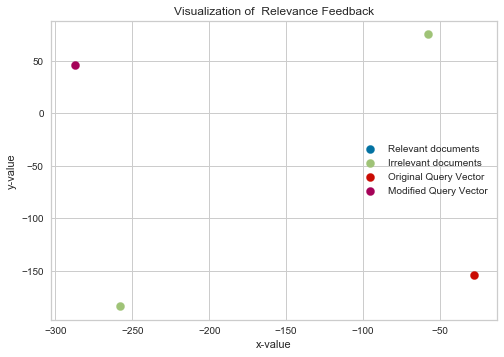

If  1  Document  comp.graphics/37261  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  2  Document  comp.graphics/38609  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  3  Document  comp.graphics/38534  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  4  Document  comp.graphics/38482  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  5  Document  comp.graphics/38241  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  6  Document  comp.graphics/38997  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  7  Document  comp.graphics/38665  is relevant ,If Yes ,Input = 1 ; otherwise 0 

If  8  Document  comp.graphics/38257  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  9  Document  comp.graphics/38947  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  10  Document  rec.motorcycles/104659  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
Relevant :  ['comp.graphics/37261', 'comp.graphics/38609', 'comp.graphics/38534', 'comp.graphics/38482']
Non - Relevant :  ['comp.graphic

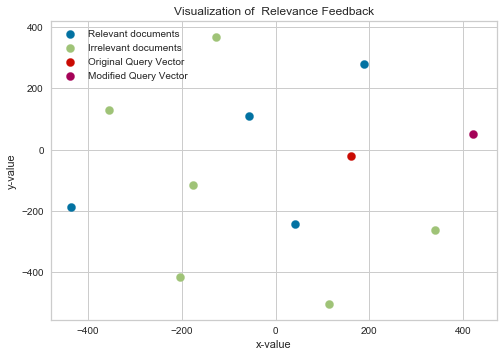

If  1  Document  comp.graphics/37261  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  2  Document  comp.graphics/38609  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  3  Document  comp.graphics/38534  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  4  Document  comp.graphics/38482  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  5  Document  comp.graphics/38241  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  6  Document  comp.graphics/38997  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  7  Document  comp.graphics/38665  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  8  Document  comp.graphics/38257  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  9  Document  comp.graphics/38947  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  10  Document  comp.graphics/38284  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
Relevant :  ['comp.graphics/37261', 'comp.graphics/38609']
Non - Relevant :  ['comp.graphics/38534', 'comp.graphics/38482', 'comp.graphics/

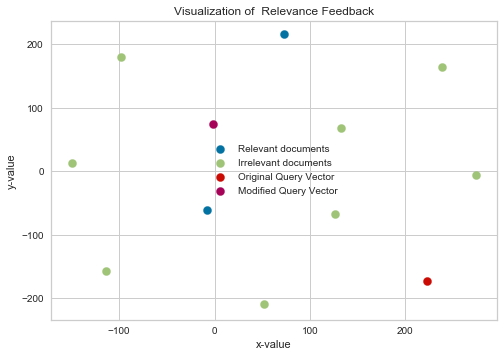

If  1  Document  comp.graphics/37261  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  2  Document  comp.graphics/38609  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  3  Document  comp.graphics/38534  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  4  Document  comp.graphics/38482  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  5  Document  comp.graphics/38241  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  6  Document  comp.graphics/38997  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  7  Document  comp.graphics/38257  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  8  Document  comp.graphics/38665  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  9  Document  comp.graphics/38947  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  10  Document  rec.motorcycles/104323  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
Relevant :  ['comp.graphics/37261']
Non - Relevant :  ['comp.graphics/38609', 'comp.graphics/38534', 'comp.graphics/38482', 'comp.graphi

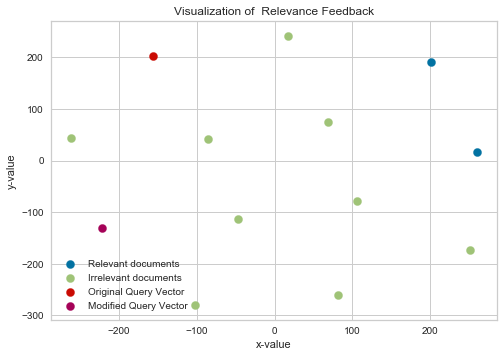

If  1  Document  comp.graphics/37261  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  2  Document  comp.graphics/38609  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  3  Document  comp.graphics/38534  is relevant ,If Yes ,Input = 1 ; otherwise 0 
2
If  4  Document  comp.graphics/38241  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  5  Document  comp.graphics/38482  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  6  Document  comp.graphics/38997  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  7  Document  comp.graphics/38257  is relevant ,If Yes ,Input = 1 ; otherwise 0 

If  8  Document  comp.graphics/38947  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  9  Document  comp.graphics/38461  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
If  10  Document  comp.graphics/39038  is relevant ,If Yes ,Input = 1 ; otherwise 0 
1
Relevant :  ['comp.graphics/38241', 'comp.graphics/38482', 'comp.graphics/38997', 'comp.graphics/38947', 'comp.graphics/38461', 'comp.graphi

In [ ]:
counter=1
while True:
    if counter!=1:
        
#         docs.append(query_vector)
    #     labels.append("query_vector"+str(counter))
    #After this
        if len(docs)==1:
            docs.append(test)
        if len(docs1)==1:
            docs1.append(test)
        docs2=[]
        docs2+=docs
        docs2+=docs1
        docs2.append(query_vector)
        docs2.append(q_optimal)
        docs2=np.array(docs2)
        tsne = TSNE(n_components=2, random_state=0)
        transformed_data = tsne.fit_transform(docs2)
        k = np.array(transformed_data)
#         tsne1 = TSNE(n_components=2, random_state=0)
#         transformed_data1 = tsne1.fit_transform(docs1)
#         k1 = np.array(transformed_data1)
#         tsne2 = TSNE(n_components=2, random_state=0)
# #         temp5=[]
# #         temp5.append(query_vector)
# #         temp5.append(q_optimal)
# #         q1=np.array(temp5)
#         transformed_data2 = tsne2.fit_transform(q1)
#         k2 = np.array(transformed_data2)
        plt.scatter(k[:len(docs),0], k[:len(docs),1], zorder=1, s=66.5,label="Relevant documents")
        plt.scatter(k[len(docs):(len(docs)+len(docs1)),0], k[len(docs):(len(docs)+len(docs1)),1], zorder=1, s=66.5,label="Irrelevant documents")
        plt.scatter(k[(len(docs)+len(docs1)):(len(docs)+len(docs1)+1),0], k[(len(docs)+len(docs1)):(len(docs)+len(docs1)+1),1], zorder=1, s=66.5,label="Original Query Vector")
        plt.scatter(k[(len(docs)+len(docs1)+1):,0], k[(len(docs)+len(docs1)+1):,1], zorder=1, s=66.5,label="Modified Query Vector")
        plt.xlabel("x-value")
        plt.ylabel("y-value")
        plt.title("Visualization of  Relevance Feedback")
        plt.legend()
        plt.show()
    
    docs=[]
    docs1=[]
    query_vector=copy.deepcopy(q_optimal)
    counter+=1
    relevant_user=[]
    nrelevant_user=[]
    for i in range(len(rel_doc)):
        print("If ",str(i+1)," Document ",rel_doc[i]," is relevant ,If Yes ,Input = 1 ; otherwise 0 ")
        if input()==str(1):
            relevant_user.append(rel_doc[i])
            docs.append(cal_tf_idf(tdf_idf_main[rel_doc[i]]))
        else:
            nrelevant_user.append(rel_doc[i])
            docs1.append(cal_tf_idf(tdf_idf_main[rel_doc[i]]))
    print("Relevant : ",relevant_user)
    print("Non - Relevant : ",nrelevant_user)
    mean_rel=centroid(relevant_user,beta)
    mean_nrel=centroid(nrelevant_user,gamma)
    query_next=[i * alpha for i in query_vector]
    q_optimal=calculate_optimal_vector(query_next,mean_rel,mean_nrel)
    #To print  the optimal query vector
#     print("Next Optimal Query Vector : ")
#     temp3=[]
#     for i in range(len(q_optimal)):
#         if q_optimal[i]<=0:
            
#         else:
#             temp3.append(q_optimal[i])
#     #         print(query_vector[i])
#     print(temp3)
    cosine_similarity=[]
    q1=magnitude(q_optimal)
    for i in corpus.keys():
        temp=[]
        for j in vocub_main:
            temp.append(tdf_idf_main[i][j])
        cosine_similarity_val=np.dot(q_optimal,temp)/float(q1*magnitude(temp))
        cosine_similarity.append(cosine_similarity_val)    
    main1=[]
    main1=sort_list(corpus.keys(),cosine_similarity)
    main1.reverse()
    print("Relevant Documents in reference with query are : ")
    rel_doc=main1[:choice]
    print(main1[:choice])
    print("Do You want further feedback, If Yes input 1 otherwise 0")
    if input()==str(1):
        
        continue
    else:
        break